# 0. Loading all Data

In [352]:
%reload_ext autoreload
%autoreload 2
from B_model import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
all_metrics_df,testParamDf = data_generation()

Unique DODs 18
Unique discharging_protocol 23
Unique charging_protocol 47
8
12
5


# 1. Data Preparation

In [353]:
# 2nd Order Raw only!
test_coef = ["0","2","3","4","exponential"]
func_coef = ["raw","second","third","forth","exponential"]
for i in range(0,1):
    globals()[f'X{test_coef[i]}'],globals()[f'y{test_coef[i]}'],globals()[f'Y{test_coef[i]}'],globals()[f'X_Y_merged{test_coef[i]}'] = \
        eval(func_coef[i]+"_order_poly_fitting(all_metrics_df,testParamDf)")

## 1.1 Choose a Data Version

In [354]:
version = '0' #raw ones
X,y,Y,X_Y_merged = eval('X'+version),eval('y'+version),eval('Y'+version),eval('X_Y_merged'+version)
objective = eval('objective_'+version)

## 1.2 Models Construction

In [355]:
model_raw = battery_model(0,X,y,Y,X_Y_merged,objective)

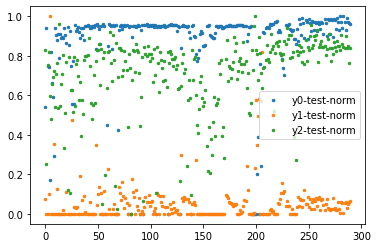

In [356]:
model_raw.plot_y_point(norm=True)

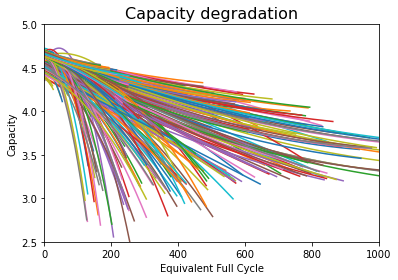

In [357]:
model_raw.plot_curve('fitting',all_metrics_df,1000,2.5)

## 1.3 Data Argumentation

### (Reset)

In [358]:
import copy
model_raw_copy = copy.deepcopy(model_raw)
#.input_restore()

# 2. Training

In [359]:
#argu_all
argu_all = np.arange(1,5)
#model_raw.input_argumentation_update(3)
len(argu_all)

4

In [360]:
loss_fun_0 = 'mse'
loss_fun_1 = 'mae'

loss_fun_all = [loss_fun_0,loss_fun_1]
len(loss_fun_all)

2

In [361]:
class_weight0 = {0: 1.,
                1: 1.,
                2: 1.}
class_weight1 = {0: 10000.,
                1: 100.,
                2: 1.}   
class_weight2 = {0: 1000000.,
                1: 1000.,
                2: 1.}       
class_weight3 = {0: 100000000.,
                1: 10000.,
                2: 1.}    
class_weight_all = [class_weight0, 
                class_weight1,
                class_weight2,
                class_weight3]
len(class_weight_all)             

4

In [362]:
nl_all = []
for i in range(10,101,30):
    for j in range(i+20,101,30):
        nl_all.append([j,i])
        for k in range(j+20,101,30):
            nl_all.append([k,j,i])
            for z in range(k+20,101,30):
                nl_all.append([z,k,j,i])
len(nl_all) 

15

In [367]:
opt_all = ['SGD', 'Adam', 'RMSprop']
len(opt_all)

3

In [371]:
epochs_all = [100,200]
len(epochs_all)

2

In [372]:
#Build a dictionary that can store all info
"""
result: setting + error
settings: loss_fun, class_weight, nl, opt, epoch
"""
result = pd.DataFrame(np.zeros((len(argu_all)*len(class_weight_all)*len(nl_all) *len(opt_all)*len(epochs_all),7)),\
    columns=['argu','loss_fun', 'class_weight', 'nl', 'opt', 'epochs','error'])
result


,argu,loss_fun,class_weight,nl,opt,epochs,error
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [373]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [374]:
index = 0  
for i0 in argu_all:
    model_raw_copy = copy.deepcopy(model_raw)
    model_raw_copy.input_argumentation_update(i0)
    for i1 in loss_fun_all:
        for i2 in class_weight_all:
            for i3 in nl_all:
                for i4 in opt_all:
                    for i5 in epochs_all:
                        result['argu'][index] = i0
                        result['loss_fun'][index] = i1
                        result['class_weight'][index] = "{}".format(i2)
                        result['nl'][index] = "{}".format(i3)
                        result['opt'][index] = i4
                        result['epochs'][index] = i5
                        result['error'][index] = model_raw_copy.model_construction_and_training(all_metrics_df,i1,i2,i3,i4,i5,0)
                        index+=1
                        print (i0,i1,i2,i3,i4,i5)


2021-11-22 16:29:53.220281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:29:53.342465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:29:57.924278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:29:58.063567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [30, 10] SGD 100


2021-11-22 16:29:58.187758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:06.836622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:06.977604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [30, 10] SGD 200


2021-11-22 16:30:07.096566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:11.540228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:11.682106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [30, 10] Adam 100


2021-11-22 16:30:11.808621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:20.706263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:20.866184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [30, 10] Adam 200


2021-11-22 16:30:21.012272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:26.315132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:26.476043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [30, 10] RMSprop 100


2021-11-22 16:30:26.624136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:37.265097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:37.391522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [30, 10] RMSprop 200


2021-11-22 16:30:37.508273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:42.330033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:42.467947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [50, 30, 10] SGD 100


2021-11-22 16:30:42.586552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:52.893019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:53.033262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [50, 30, 10] SGD 200


2021-11-22 16:30:53.153043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:57.984972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:30:58.127852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [50, 30, 10] Adam 100


2021-11-22 16:30:58.255333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:08.110475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:08.270608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [50, 30, 10] Adam 200


2021-11-22 16:31:08.414112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:13.981216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:14.146420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [50, 30, 10] RMSprop 100


2021-11-22 16:31:14.285361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:26.517457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:26.643040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [50, 30, 10] RMSprop 200


2021-11-22 16:31:26.756171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:31.733727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:31.880434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [70, 50, 30, 10] SGD 100


2021-11-22 16:31:32.001327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:42.024478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:42.167662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [70, 50, 30, 10] SGD 200


2021-11-22 16:31:42.292578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:47.617591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:47.772002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [70, 50, 30, 10] Adam 100


2021-11-22 16:31:47.907966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:59.195166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:31:59.368668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [70, 50, 30, 10] Adam 200


2021-11-22 16:31:59.514185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:05.203616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:05.376086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [70, 50, 30, 10] RMSprop 100


2021-11-22 16:32:05.537211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:17.663546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:17.798833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [70, 50, 30, 10] RMSprop 200


2021-11-22 16:32:17.911678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:22.969988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:23.107641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 50, 30, 10] SGD 100


2021-11-22 16:32:23.877569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:34.279171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:34.432127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 50, 30, 10] SGD 200


2021-11-22 16:32:34.569910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:39.767142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:39.911339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 50, 30, 10] Adam 100


2021-11-22 16:32:40.044160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:49.841802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:50.006634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 50, 30, 10] Adam 200


2021-11-22 16:32:50.162609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:56.289447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:32:56.468384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 50, 30, 10] RMSprop 100


2021-11-22 16:32:56.627159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:09.187239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:09.311314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 50, 30, 10] RMSprop 200


2021-11-22 16:33:09.423133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:14.044915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:14.168443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 30, 10] SGD 100


2021-11-22 16:33:14.278004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:24.035586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:24.185026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 30, 10] SGD 200


2021-11-22 16:33:24.316528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:29.128443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:29.276064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 30, 10] Adam 100


2021-11-22 16:33:29.399177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:40.108020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:40.278686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 30, 10] Adam 200


2021-11-22 16:33:40.435236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:46.031327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:46.191810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 30, 10] RMSprop 100


2021-11-22 16:33:46.349976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:58.046651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:33:58.182033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 30, 10] RMSprop 200


2021-11-22 16:33:58.300904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:03.363382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:03.498315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 30, 10] SGD 100


2021-11-22 16:34:03.610621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:13.796807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:13.934317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 30, 10] SGD 200


2021-11-22 16:34:14.053925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:19.305403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:19.457102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 30, 10] Adam 100


2021-11-22 16:34:19.596391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:29.472640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:29.632684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 30, 10] Adam 200


2021-11-22 16:34:29.779488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:35.267294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:35.427793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 30, 10] RMSprop 100


2021-11-22 16:34:35.571460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:46.983539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:47.113363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 30, 10] RMSprop 200


2021-11-22 16:34:47.222672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:52.161054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:34:52.297412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 10] SGD 100


2021-11-22 16:34:52.408873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:01.978533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:02.115915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 10] SGD 200


2021-11-22 16:35:02.246502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:07.199136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:07.346200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 10] Adam 100


2021-11-22 16:35:07.470982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:17.927180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:18.094349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 10] Adam 200


2021-11-22 16:35:18.238747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:24.059769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:24.227194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 10] RMSprop 100


2021-11-22 16:35:24.386149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:35.938413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:36.062167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 10] RMSprop 200


2021-11-22 16:35:36.172478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:40.493907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:40.616839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 10] SGD 100


2021-11-22 16:35:40.728237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:49.477018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:49.615608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 10] SGD 200


2021-11-22 16:35:49.729400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:54.547665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:35:54.686696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 10] Adam 100


2021-11-22 16:35:55.308096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:05.279085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:05.442657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 10] Adam 200


2021-11-22 16:36:05.583462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:11.512768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:11.675396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 10] RMSprop 100


2021-11-22 16:36:11.819949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:23.311212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:23.443760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 10] RMSprop 200


2021-11-22 16:36:23.560080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:28.261065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:28.384005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 10] SGD 100


2021-11-22 16:36:28.493588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:38.052320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:38.197626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 10] SGD 200


2021-11-22 16:36:38.315291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:43.235158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:43.386556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 10] Adam 100


2021-11-22 16:36:43.505588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:53.814771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:36:53.986094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 10] Adam 200


2021-11-22 16:36:54.139609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:00.308784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:00.506866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 10] RMSprop 100


2021-11-22 16:37:00.660226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:13.362715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 10] RMSprop 200


2021-11-22 16:37:13.596003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:13.771887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:19.581441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:19.754414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 10] SGD 100


2021-11-22 16:37:19.898715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:30.008802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:30.164900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 10] SGD 200


2021-11-22 16:37:30.285715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:35.226124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:35.370986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 10] Adam 100


2021-11-22 16:37:35.490976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:45.498257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:45.667677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 10] Adam 200


2021-11-22 16:37:46.210046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:52.270638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:37:52.446411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 10] RMSprop 100


2021-11-22 16:37:52.600668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:05.147338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:05.298046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 10] RMSprop 200


2021-11-22 16:38:05.416691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:10.258327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:10.388362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 40] SGD 100


2021-11-22 16:38:10.499934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:20.226658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:20.371881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 40] SGD 200


2021-11-22 16:38:20.488450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:25.449417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:25.604651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 40] Adam 100


2021-11-22 16:38:25.737592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:35.751027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:35.912137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 40] Adam 200


2021-11-22 16:38:36.057978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:41.807756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:41.968900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 40] RMSprop 100


2021-11-22 16:38:42.111192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:54.241246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:54.378024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [60, 40] RMSprop 200


2021-11-22 16:38:54.494917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:59.607016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:38:59.736968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 40] SGD 100


2021-11-22 16:38:59.848984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:09.563270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:09.711494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 40] SGD 200


2021-11-22 16:39:09.832751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:14.885564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:15.028860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 40] Adam 100


2021-11-22 16:39:15.151266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:25.099793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:25.264383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 40] Adam 200


2021-11-22 16:39:25.402750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:31.191787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 40] RMSprop 100


2021-11-22 16:39:31.696860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:31.847210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:43.782647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:43.913477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [80, 60, 40] RMSprop 200


2021-11-22 16:39:44.026472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:49.252012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:49.385187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 40] SGD 100


2021-11-22 16:39:49.500851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:59.535808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:39:59.699046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 40] SGD 200


2021-11-22 16:39:59.821552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:05.007451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:05.156441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 40] Adam 100


2021-11-22 16:40:05.277530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:15.479602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:15.646282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 40] Adam 200


2021-11-22 16:40:15.789976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:21.706511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:21.867835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 40] RMSprop 100


2021-11-22 16:40:22.007893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:34.182048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:34.317796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [100, 80, 60, 40] RMSprop 200


2021-11-22 16:40:34.441849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:39.464760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:39.599718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 40] SGD 100


2021-11-22 16:40:39.720516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:49.597394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:49.751490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 40] SGD 200


2021-11-22 16:40:49.872558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:54.990388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:40:55.135256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 40] Adam 100


2021-11-22 16:40:55.255357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:05.427106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:05.600201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 40] Adam 200


2021-11-22 16:41:05.748440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:11.689935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 40] RMSprop 100


2021-11-22 16:41:11.896955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:12.047008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:24.566355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 40] RMSprop 200


2021-11-22 16:41:25.112341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:25.254605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:30.911803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:31.040660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 70] SGD 100


2021-11-22 16:41:31.155217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:41.819431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:41.964399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 70] SGD 200


2021-11-22 16:41:42.124146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:48.701294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:41:48.875294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 70] Adam 100


2021-11-22 16:41:49.019413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:00.506301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:00.679357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 70] Adam 200


2021-11-22 16:42:00.826724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:07.315500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:07.490003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 70] RMSprop 100


2021-11-22 16:42:07.641240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:20.343085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:20.476204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1.0, 1: 1.0, 2: 1.0} [90, 70] RMSprop 200


2021-11-22 16:42:20.587308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:25.373203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [30, 10] SGD 100


2021-11-22 16:42:25.580835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:25.744423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:35.493409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:35.643118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [30, 10] SGD 200


2021-11-22 16:42:35.771379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:41.092385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:41.238408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [30, 10] Adam 100


2021-11-22 16:42:41.383080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:51.535205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:51.708534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [30, 10] Adam 200


2021-11-22 16:42:51.856854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:57.916748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:42:58.092467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [30, 10] RMSprop 100


2021-11-22 16:42:58.244181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:09.371030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:09.504567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [30, 10] RMSprop 200


2021-11-22 16:43:09.616626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:14.169047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [50, 30, 10] SGD 100


2021-11-22 16:43:14.671508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:14.794847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:24.482131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:24.623621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [50, 30, 10] SGD 200


2021-11-22 16:43:24.741841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:29.552238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:29.701649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [50, 30, 10] Adam 100


2021-11-22 16:43:29.825713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:39.900586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:40.062777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [50, 30, 10] Adam 200


2021-11-22 16:43:40.199073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:46.730219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [50, 30, 10] RMSprop 100


2021-11-22 16:43:46.939154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:47.096949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:59.577995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:43:59.767039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [50, 30, 10] RMSprop 200


2021-11-22 16:43:59.921023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:04.381992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:04.514431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [70, 50, 30, 10] SGD 100


2021-11-22 16:44:04.625476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:13.286328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:13.431686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [70, 50, 30, 10] SGD 200


2021-11-22 16:44:13.551044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:18.018377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:18.154219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [70, 50, 30, 10] Adam 100


2021-11-22 16:44:18.268999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:27.244092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:27.414163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [70, 50, 30, 10] Adam 200


2021-11-22 16:44:27.559837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:32.882110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:33.041255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [70, 50, 30, 10] RMSprop 100


2021-11-22 16:44:33.179364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:43.852274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:44.013005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [70, 50, 30, 10] RMSprop 200


2021-11-22 16:44:44.134226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:49.344830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:44:49.493145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 50, 30, 10] SGD 100


2021-11-22 16:44:49.616770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:00.064708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 50, 30, 10] SGD 200


2021-11-22 16:45:00.564136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:00.697069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:05.756080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:05.898682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 50, 30, 10] Adam 100


2021-11-22 16:45:06.020006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:15.431336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:15.591638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 50, 30, 10] Adam 200


2021-11-22 16:45:15.744647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:21.200203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:21.362723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 50, 30, 10] RMSprop 100


2021-11-22 16:45:21.506053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:32.455470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:32.580581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 50, 30, 10] RMSprop 200


2021-11-22 16:45:32.688636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:37.352423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:37.479286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 30, 10] SGD 100


2021-11-22 16:45:37.587114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:46.597047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:46.734107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 30, 10] SGD 200


2021-11-22 16:45:46.848473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:51.406042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:45:51.542192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 30, 10] Adam 100


2021-11-22 16:45:51.659106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:01.232181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:01.414771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 30, 10] Adam 200


2021-11-22 16:46:01.564143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:07.300480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:07.459881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 30, 10] RMSprop 100


2021-11-22 16:46:07.610177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:19.144040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:19.271531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 30, 10] RMSprop 200


2021-11-22 16:46:19.388243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:24.759395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:24.900379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 30, 10] SGD 100


2021-11-22 16:46:25.019799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:34.947390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:35.094152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 30, 10] SGD 200


2021-11-22 16:46:35.210558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:39.845657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 30, 10] Adam 100


2021-11-22 16:46:40.359023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:40.487442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:50.855123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:51.015700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 30, 10] Adam 200


2021-11-22 16:46:51.155873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:58.052201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 30, 10] RMSprop 100


2021-11-22 16:46:58.338756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:46:58.546606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:10.706005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:10.841057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 30, 10] RMSprop 200


2021-11-22 16:47:10.956216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:15.641225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:15.768385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 10] SGD 100


2021-11-22 16:47:15.875838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:24.511243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:24.661165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 10] SGD 200


2021-11-22 16:47:24.790876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:29.367192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:29.506428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 10] Adam 100


2021-11-22 16:47:29.619086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:39.805128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 10] Adam 200


2021-11-22 16:47:40.015519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:40.266091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:45.892721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 10] RMSprop 100


2021-11-22 16:47:46.096916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:46.259848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:59.009315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:47:59.149211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 10] RMSprop 200


2021-11-22 16:47:59.265556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:03.954682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:04.089522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 10] SGD 100


2021-11-22 16:48:04.206266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:13.490475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:13.643187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 10] SGD 200


2021-11-22 16:48:13.770611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:18.632809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:18.822904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 10] Adam 100


2021-11-22 16:48:18.947370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:29.743754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:29.921224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 10] Adam 200


2021-11-22 16:48:30.095377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:36.823518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:36.995082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 10] RMSprop 100


2021-11-22 16:48:37.150867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:48.192868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:48.326010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 10] RMSprop 200


2021-11-22 16:48:48.439416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:53.149511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:48:53.281802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 10] SGD 100


2021-11-22 16:48:53.395203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:03.920235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:04.070221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 10] SGD 200


2021-11-22 16:49:04.196060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:09.250426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:09.394142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 10] Adam 100


2021-11-22 16:49:09.513560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:19.888462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:20.075658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 10] Adam 200


2021-11-22 16:49:20.225622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:26.123098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:26.285528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 10] RMSprop 100


2021-11-22 16:49:26.428844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:38.001616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:38.138387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 10] RMSprop 200


2021-11-22 16:49:38.258252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:43.028453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:43.163572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 10] SGD 100


2021-11-22 16:49:43.289464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:53.700063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:53.857400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 10] SGD 200


2021-11-22 16:49:53.996661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:59.230307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:49:59.375672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 10] Adam 100


2021-11-22 16:49:59.490454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:09.740208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 10] Adam 200


2021-11-22 16:50:10.343196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:10.496660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:16.511139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:16.684759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 10] RMSprop 100


2021-11-22 16:50:16.843961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:28.377269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:28.511187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 10] RMSprop 200


2021-11-22 16:50:28.636895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:33.570647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:33.706341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 40] SGD 100


2021-11-22 16:50:33.821207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:44.291099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:44.452078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 40] SGD 200


2021-11-22 16:50:44.585513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:49.456729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:49.599669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 40] Adam 100


2021-11-22 16:50:49.727708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:59.592046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:50:59.752015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 40] Adam 200


2021-11-22 16:50:59.892186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:06.124634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 40] RMSprop 100


2021-11-22 16:51:06.331614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:06.493347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:17.961846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:18.087099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [60, 40] RMSprop 200


2021-11-22 16:51:18.199634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:22.929028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:23.054192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 40] SGD 100


2021-11-22 16:51:23.167035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:32.562613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:32.704586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 40] SGD 200


2021-11-22 16:51:32.822937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:37.673098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:37.813949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 40] Adam 100


2021-11-22 16:51:37.930722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:47.606977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:47.767289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 40] Adam 200


2021-11-22 16:51:47.909934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:53.936800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:51:54.104778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 40] RMSprop 100


2021-11-22 16:51:54.270319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:06.269266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:06.402004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [80, 60, 40] RMSprop 200


2021-11-22 16:52:06.516703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:11.334269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:11.458539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 40] SGD 100


2021-11-22 16:52:11.568985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:21.051269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:21.189062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 40] SGD 200


2021-11-22 16:52:21.307438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:26.228400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:26.367838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 40] Adam 100


2021-11-22 16:52:26.485732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:36.316700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:36.479256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 40] Adam 200


2021-11-22 16:52:36.620041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:42.409479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:42.569679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 40] RMSprop 100


2021-11-22 16:52:42.712324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:54.576631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:54.704984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [100, 80, 60, 40] RMSprop 200


2021-11-22 16:52:54.819463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:59.613373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:52:59.736997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 40] SGD 100


2021-11-22 16:52:59.848009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:09.414952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:09.554121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 40] SGD 200


2021-11-22 16:53:09.673713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:14.712387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:14.852195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 40] Adam 100


2021-11-22 16:53:14.969147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:24.846838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:25.007298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 40] Adam 200


2021-11-22 16:53:25.147559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:30.953488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 40] RMSprop 100


2021-11-22 16:53:31.451580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:31.608161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:43.682675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:43.811420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 40] RMSprop 200


2021-11-22 16:53:43.933483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:49.188752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:53:49.316287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 70] SGD 100


2021-11-22 16:53:49.430491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:00.428265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:00.566975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 70] SGD 200


2021-11-22 16:54:00.689617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:06.097198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:06.241941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 70] Adam 100


2021-11-22 16:54:06.362817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:16.998947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:17.161277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 70] Adam 200


2021-11-22 16:54:17.307950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:23.327473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:23.486169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 70] RMSprop 100


2021-11-22 16:54:23.630075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:35.678992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:35.803204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 10000.0, 1: 100.0, 2: 1.0} [90, 70] RMSprop 200


2021-11-22 16:54:35.911266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:40.815168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:40.973766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [30, 10] SGD 100


2021-11-22 16:54:41.117702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:50.293142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:50.430871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [30, 10] SGD 200


2021-11-22 16:54:50.549597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:55.158450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:54:55.297686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [30, 10] Adam 100


2021-11-22 16:54:55.416434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:04.632883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:04.794616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [30, 10] Adam 200


2021-11-22 16:55:04.933840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:10.411899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:10.572084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [30, 10] RMSprop 100


2021-11-22 16:55:10.713279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:21.864225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:21.997020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [30, 10] RMSprop 200


2021-11-22 16:55:22.119911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:26.885094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:27.017136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [50, 30, 10] SGD 100


2021-11-22 16:55:27.131605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:36.237684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:36.380493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [50, 30, 10] SGD 200


2021-11-22 16:55:36.502120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:41.256172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:41.395448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [50, 30, 10] Adam 100


2021-11-22 16:55:41.512624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:50.838131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:51.000166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [50, 30, 10] Adam 200


2021-11-22 16:55:51.140964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:56.666857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:55:56.833105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [50, 30, 10] RMSprop 100


2021-11-22 16:55:56.977295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:08.046633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:08.175797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [50, 30, 10] RMSprop 200


2021-11-22 16:56:08.287590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:12.834298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:12.962271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [70, 50, 30, 10] SGD 100


2021-11-22 16:56:13.074554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:22.367218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:22.505404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [70, 50, 30, 10] SGD 200


2021-11-22 16:56:22.621698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:27.312605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:27.451525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [70, 50, 30, 10] Adam 100


2021-11-22 16:56:27.568972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:36.876769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:37.041640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [70, 50, 30, 10] Adam 200


2021-11-22 16:56:37.183273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:42.734921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:42.895805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [70, 50, 30, 10] RMSprop 100


2021-11-22 16:56:43.041173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:54.093800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [70, 50, 30, 10] RMSprop 200


2021-11-22 16:56:54.582923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:54.700483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:59.492749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:56:59.626755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 50, 30, 10] SGD 100


2021-11-22 16:56:59.742178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:09.051708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:09.192001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 50, 30, 10] SGD 200


2021-11-22 16:57:09.310466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:14.055278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:14.194717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 50, 30, 10] Adam 100


2021-11-22 16:57:14.315832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:23.820726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:23.983176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 50, 30, 10] Adam 200


2021-11-22 16:57:24.123989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:29.726396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:29.887978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 50, 30, 10] RMSprop 100


2021-11-22 16:57:30.029833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:41.214076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:41.339609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 50, 30, 10] RMSprop 200


2021-11-22 16:57:41.454668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:46.023694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:46.152369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 30, 10] SGD 100


2021-11-22 16:57:46.260552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:55.147318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:57:55.285437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 30, 10] SGD 200


2021-11-22 16:57:55.399995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:00.733148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:00.888384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 30, 10] Adam 100


2021-11-22 16:58:01.007048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:10.110469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:10.284426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 30, 10] Adam 200


2021-11-22 16:58:10.427524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:15.829353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:15.999280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 30, 10] RMSprop 100


2021-11-22 16:58:16.139513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:26.896287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:27.025056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 30, 10] RMSprop 200


2021-11-22 16:58:27.133700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:32.029930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:32.159715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 30, 10] SGD 100


2021-11-22 16:58:32.281136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:41.534320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:41.677180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 30, 10] SGD 200


2021-11-22 16:58:41.798967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:46.506726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:46.648242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 30, 10] Adam 100


2021-11-22 16:58:46.767583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:56.024824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:58:56.185055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 30, 10] Adam 200


2021-11-22 16:58:56.322919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:01.800181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:01.958018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 30, 10] RMSprop 100


2021-11-22 16:59:02.096627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:12.956037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:13.078285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 30, 10] RMSprop 200


2021-11-22 16:59:13.188432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:17.556655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:17.680812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [60, 10] SGD 100


2021-11-22 16:59:17.790056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:26.511367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:26.649638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [60, 10] SGD 200


2021-11-22 16:59:26.769299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:31.290224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:31.428905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [60, 10] Adam 100


2021-11-22 16:59:31.573746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:40.625238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:40.784798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [60, 10] Adam 200


2021-11-22 16:59:40.925379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:46.299222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:46.455777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [60, 10] RMSprop 100


2021-11-22 16:59:46.593827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:57.338768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:59:57.462564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [60, 10] RMSprop 200


2021-11-22 16:59:57.571408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:01.934124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 60, 10] SGD 100


2021-11-22 17:00:02.387071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:02.503464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:11.603037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:11.745111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 60, 10] SGD 200


2021-11-22 17:00:11.865136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:16.508752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:16.646688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 60, 10] Adam 100


2021-11-22 17:00:16.762510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:25.867327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:26.026139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 60, 10] Adam 200


2021-11-22 17:00:26.163483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:31.565480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:31.723932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 60, 10] RMSprop 100


2021-11-22 17:00:31.865572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:42.653894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:42.783406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [80, 60, 10] RMSprop 200


2021-11-22 17:00:42.893522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:47.357212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:47.480759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 60, 10] SGD 100


2021-11-22 17:00:47.589708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:56.448170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:00:56.584129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 60, 10] SGD 200


2021-11-22 17:00:56.700437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:01.296259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:01.431781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 60, 10] Adam 100


2021-11-22 17:01:01.546728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:10.707643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:10.864968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 60, 10] Adam 200


2021-11-22 17:01:11.003108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:16.472899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:16.631820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 60, 10] RMSprop 100


2021-11-22 17:01:16.771509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:27.521738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:27.643661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [100, 80, 60, 10] RMSprop 200


2021-11-22 17:01:27.748395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:32.138349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:32.260462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [90, 10] SGD 100


2021-11-22 17:01:32.367149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:41.481573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:41.622973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [90, 10] SGD 200


2021-11-22 17:01:41.747759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:46.499614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:46.643903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [90, 10] Adam 100


2021-11-22 17:01:46.768251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:56.000062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:01:56.162707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [90, 10] Adam 200


2021-11-22 17:01:56.303078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:02:01.715526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 17:02:01.873970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1 mse {0: 1000000.0, 1: 1000.0, 2: 1.0} [90, 10] RMSprop 100


2021-11-22 17:02:02.011541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [340]:
model_raw_copy.model.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 30)                330       
_________________________________________________________________
dense_238 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_239 (Dense)            (None, 3)                 33        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [346]:
model_raw_copy.model_construction_and_training(all_metrics_df,i1,i2,i3,'Adam',i5,1)

Epoch 1/200
8/8 [==============================] - 0s 15ms/step - loss: 0.4405 - accuracy: 0.4643 - val_loss: 0.4444 - val_accuracy: 0.4474
Epoch 2/200
1/8 [==>...........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.5312

2021-11-22 16:16:09.870838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-22 16:16:09.996344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 7ms/step - loss: 0.3550 - accuracy: 0.5119 - val_loss: 0.3635 - val_accuracy: 0.5526
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2922 - accuracy: 0.5397 - val_loss: 0.2942 - val_accuracy: 0.6316
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2417 - accuracy: 0.5714 - val_loss: 0.2393 - val_accuracy: 0.6579
Epoch 5/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2019 - accuracy: 0.6111 - val_loss: 0.1934 - val_accuracy: 0.7368
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1678 - accuracy: 0.6984 - val_loss: 0.1569 - val_accuracy: 0.7895
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1392 - accuracy: 0.7222 - val_loss: 0.1269 - val_accuracy: 0.8158
Epoch 8/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1153 - accuracy: 0.7421 - val_loss: 0.1025 - val_accuracy: 0.8158
Epoch 9/200
8/8 [======================

2021-11-22 16:16:21.336463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


277.5730488681082

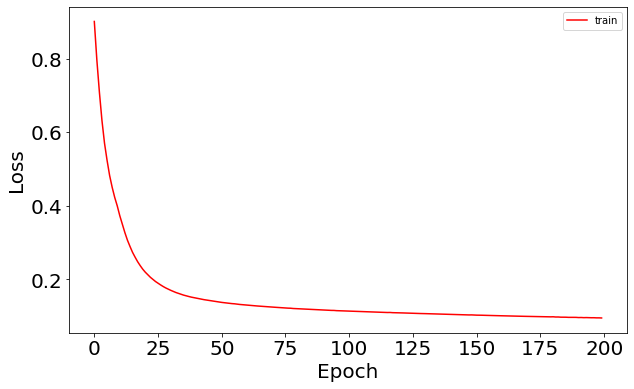

In [342]:
model_raw_copy.loss_function_plot()

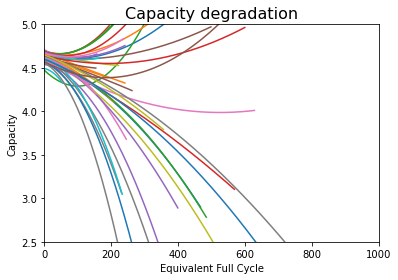

In [348]:
model_raw_copy.plot_curve("test",all_metrics_df,1000,2.5)

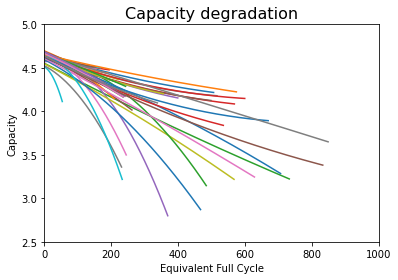

In [349]:
model_raw_copy.plot_curve("test_true",all_metrics_df,1000,2.5)

In [347]:
model_raw_copy.error

277.5730488681082